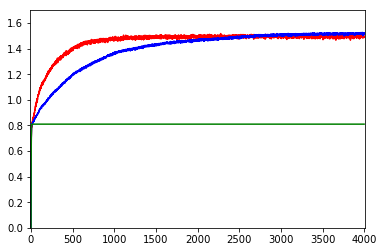

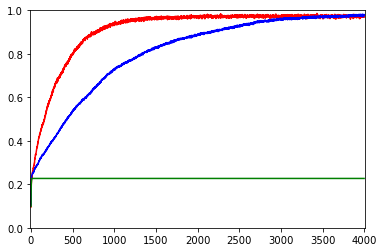

In [229]:
import numpy as np
import matplotlib.pyplot as plt

mu = 0
sigma = 1
group_num = 2000
arm_num = 10
play_num = 4000
average_reward_1 = np.array([0]* play_num, dtype= 'float')
average_reward_2 = np.array([0]* play_num, dtype= 'float')
average_reward_3 = np.array([0]* play_num, dtype= 'float')
optimal_action_rate_1 = np.array([0]* play_num, dtype= 'float')
optimal_action_rate_2 = np.array([0]* play_num, dtype= 'float')
optimal_action_rate_3 = np.array([0]* play_num, dtype= 'float')
q_real = np.zeros((group_num,arm_num))
q_get = np.zeros((group_num,arm_num))
for q_ele in range(group_num):
    q_real[q_ele] = np.random.normal(mu, sigma,arm_num)

    
sum_of_q = 0
j=1
optimal_action = 0
epsilon = 0.03
while j <= play_num:  
    for group_index in range(group_num):
        if (random.random() < epsilon)or(j == 1):
            i = random.randint(0,9)
        else:
            i = np.argmax(q_get[group_index])
        
        if(i == np.argmax(q_real[group_index])):
            optimal_action +=1

        q_get[group_index,i] = q_real[group_index,i]
        sum_of_q += q_get[group_index,i]
        
    average_for_one_time = sum_of_q/group_num
    average_reward_1[j-1] = average_for_one_time
    optimal_action_rate_1[j-1] = optimal_action/group_num
    sum_of_q = 0
    optimal_action = 0
    j += 1

j=1
epsilon = 0.01
q_get = np.zeros((group_num,arm_num))
optimal_action = 0
while j <= play_num:  
    for group_index in range(group_num):
        if (random.random() < epsilon)or(j == 1):
            i = random.randint(0,9)
        else:
            i = np.argmax(q_get[group_index])
            
        if(i == np.argmax(q_real[group_index])):
            optimal_action += 1
            

        q_get[group_index,i] = q_real[group_index,i]
        sum_of_q += q_get[group_index,i]
        
    average_for_one_time = sum_of_q/group_num
    average_reward_2[j-1] = average_for_one_time
    optimal_action_rate_2[j-1] = optimal_action/group_num
    sum_of_q = 0
    optimal_action = 0
    j += 1

optimal_action = 0
j=1
q_get = np.zeros((group_num,arm_num))
while j <= play_num:  
    for group_index in range(group_num):
        if (j == 1):
            i = random.randint(0,9)
        else:
            i = np.argmax(q_get[group_index])
            
        if(i==np.argmax(q_real[group_index])):
            optimal_action +=1

        q_get[group_index,i] = q_real[group_index,i]
        sum_of_q += q_get[group_index,i]
        
    average_for_one_time = sum_of_q/group_num
    average_reward_3[j-1] = average_for_one_time
    optimal_action_rate_3[j-1] = optimal_action/group_num
    sum_of_q = 0
    optimal_action = 0
    j += 1

x = range(play_num)

plt.plot(x,average_reward_1,'r')
plt.plot(x,average_reward_2,'b')
plt.plot(x,average_reward_3,'g')
plt.axis([-10,4010,0,1.7])
plt.show()

plt.figure()
plt.plot(x,optimal_action_rate_1,'r')
plt.plot(x,optimal_action_rate_2,'b')
plt.plot(x,optimal_action_rate_3,'g')
plt.axis([-10,4010,0,1])

plt.show()


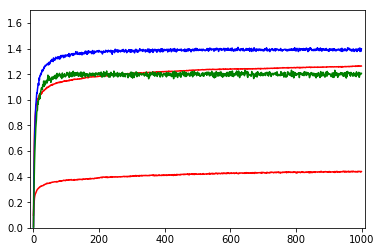

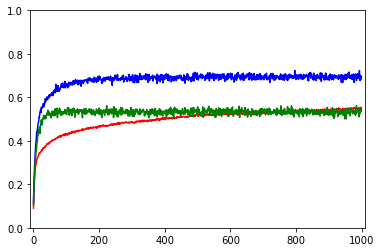

In [252]:
import numpy as np
import matplotlib.pyplot as plt

def random_pick(some_list, probabilities):  
    x = random.uniform(0,1)  
    cumulative_probability = 0.0  
    for item, item_probability in zip(some_list, probabilities):  
        cumulative_probability += item_probability  
        if x < cumulative_probability:break  
    return some_list.tolist().index(item)  


mu = 0
sigma = 1
group_num = 2000
arm_num = 10
play_num = 1000
average_reward_1 = np.array([0]* play_num, dtype= 'float')
average_reward_2 = np.array([0]* play_num, dtype= 'float')
average_reward_3 = np.array([0]* play_num, dtype= 'float')
optimal_action_rate_1 = np.array([0]* play_num, dtype= 'float')
optimal_action_rate_2 = np.array([0]* play_num, dtype= 'float')
optimal_action_rate_3 = np.array([0]* play_num, dtype= 'float')
q_real = np.zeros((group_num,arm_num))
q_get = np.zeros((group_num,arm_num))
prob_temp = np.zeros((group_num,arm_num))
for q_ele in range(group_num):
    q_real[q_ele] = np.random.normal(mu, sigma,arm_num)

    
sum_of_q = 0
j=1
optimal_action = 0
temperature = 0.1
while j <= play_num:  
    for group_index in range(group_num):
        i = random_pick(q_get[group_index],prob_temp[group_index])      
        if (j == 1):
            i = random.randint(0,9)

        q_get[group_index,i] = q_real[group_index,i]
        for k in range(arm_num):
            prob_temp[group_index,k] = np.exp(q_get[group_index,k]/temperature)/sum(np.exp(q_get[group_index]/temperature))
            
        sum_of_q += q_get[group_index,i]
        if(i == np.argmax(q_real[group_index])):
            optimal_action +=1
        
    average_for_one_time = sum_of_q/group_num
    average_reward_1[j-1] = average_for_one_time
    optimal_action_rate_1[j-1] = optimal_action/group_num
    sum_of_q = 0
    optimal_action = 0
    j += 1

sum_of_q = 0
j=1
optimal_action = 0
temperature = 0.3 
q_get = np.zeros((group_num,arm_num))
prob_temp = np.zeros((group_num,arm_num))
while j <= play_num:  
    for group_index in range(group_num):
        i = random_pick(q_get[group_index],prob_temp[group_index])      
        if (j == 1):
            i = random.randint(0,9)

        q_get[group_index,i] = q_real[group_index,i]
        for k in range(arm_num):
            prob_temp[group_index,k] = np.exp(q_get[group_index,k]/temperature)/sum(np.exp(q_get[group_index]/temperature))
            
        sum_of_q += q_get[group_index,i]
        if(i == np.argmax(q_real[group_index])):
            optimal_action +=1
        
    average_for_one_time = sum_of_q/group_num
    average_reward_2[j-1] = average_for_one_time
    optimal_action_rate_2[j-1] = optimal_action/group_num
    sum_of_q = 0
    optimal_action = 0
    j += 1

sum_of_q = 0
j=1
optimal_action = 0
temperature = 0.5 
q_get = np.zeros((group_num,arm_num))
prob_temp = np.zeros((group_num,arm_num))
while j <= play_num:  
    for group_index in range(group_num):
              
        i = random_pick(q_get[group_index],prob_temp[group_index])
        if (j == 1):
            i = random.randint(0,9)   

        q_get[group_index,i] = q_real[group_index,i]
        for k in range(arm_num):
            prob_temp[group_index,k] = np.exp(q_get[group_index,k]/temperature)/sum(np.exp(q_get[group_index]/temperature))
            
        sum_of_q += q_get[group_index,i]
        if(i == np.argmax(q_real[group_index])):
            optimal_action +=1
        
    average_for_one_time = sum_of_q/group_num
    average_reward_3[j-1] = average_for_one_time
    optimal_action_rate_3[j-1] = optimal_action/group_num
    sum_of_q = 0
    optimal_action = 0
    j += 1




x = range(play_num)

plt.plot(x,average_reward_1,'r')
plt.plot(x,average_reward_2,'b')
plt.plot(x,average_reward_3,'g')
plt.axis([-10,1010,0,1.7])
plt.show()

plt.figure()
plt.plot(x,optimal_action_rate_1,'r')
plt.plot(x,optimal_action_rate_2,'b')
plt.plot(x,optimal_action_rate_3,'g')
plt.axis([-10,1010,0,1])

plt.show()
